Latex Macros:
$$
\newcommand{\E}{\text{E}}
\newcommand{\mbf}{\mathbf}
\newcommand{\bs}{\boldsymbol}
\newcommand{\Cov}{\text{Cov}}
\newcommand{\Var}{\text{Var}}
\newcommand{\Cov}{\text{Cov}}
\newcommand{\A}[1]{\mathbf{A}_{#1}}
\newcommand{\Ai}[1]{\mathbf{A}^{#1}}
$$

In [26]:
macro javascript_str(s) display("text/javascript", s); end
javascript"""
    MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });
    MathJax.Hub.Queue( 
        ["resetEquationNumbers",MathJax.InputJax.TeX], 
        ["PreProcess",MathJax.Hub], 
        ["Reprocess",MathJax.Hub] 
    );
"""

Mixed Linear Model
=======================================

Consider the mixed linear model

\begin{equation}
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \mathbf{Zu} + \mathbf{e}, 
\label{eq.mixedModel}
\end{equation}

where $\boldsymbol{\beta}$ is a vector of fixed effects, $\mathbf{X}$ is an observed matrix that relates $\boldsymbol{\beta}$ to $\mathbf{y}$, $\mathbf{u}$ is a vector of multivariate normal random effects with null means and covariance matrix $\mathbf{G}\sigma^2_u$, and $\mathbf{e}$ is a vector of multivariate normal residuals with null means and covariance matrix $\mathbf{R}\sigma^2_e$. The fixed effects are usually assigned a flat prior distribution, and the matrices $\mathbf{G}$ and $\mathbf{R}$ are assumed to be known. The variance components $\sigma^2_u$ and $\sigma^2_e$ will be assigned scaled inverted chi-square prior distributions with scale parameter $S_{u}^{2}$ and degrees of freedom $\nu_{u}$ for $\sigma^2_u$ and parameters $S_{e}^{2}$ and $\nu_{e}$ for $\sigma^2_e$. As described in Sorensen and Gianola (2002), the Gibbs sampler can be used to construct a Markov chain that has the posterior for the unknowns in the model as its stationary distribution. This is accomplished be sampling from the full-conditional posteriors of the unknowns. The derivations presented below closely follow those in Sorensen and Gianola (2002).  

Then, the joint
posterior for all the unknowns, denoted by $\boldsymbol{\theta}$, is

\begin{align}
f(\boldsymbol{\theta}|\mathbf{y}) 
& \propto f(\mathbf{y}|\boldsymbol{\theta})f(\boldsymbol{\theta})\\
& \propto \left(\sigma_{e}^{2}\right)^{-n/2}
\exp\left\{ 
-\frac{(\mathbf{y} - \mathbf{X}\boldsymbol{\beta} - \mathbf{Zu})'\mathbf{R}^{-1} 
       (\mathbf{y} - \mathbf{X}\boldsymbol{\beta} - \mathbf{Zu})}{2\sigma_{e}^{2}}
\right\} \\
& \times \left(\sigma_{u}^{2}\right)^{-k/2}
\exp \left\{ 
-\frac{\mathbf{u}'\mathbf{G}^{-1}\mathbf{u}}
      {2\sigma_{u}^{2}}
\right\} \label{eq:prioru} \\ 
& \times (\sigma_{u}^{2})^{-(2+\nu_{u})/2}\exp\left\{ -\frac{\nu_{u}S_{u}^{2}}{2\sigma_{u}^{2}}\right\} \label{eq:priorSigmau} \\ 
& \times (\sigma_{e}^{2})^{-(2+\nu_{e})/2}\exp\left\{ -\frac{\nu_{e}S_{e}^{2}}{2\sigma_{e}^{2}}\right\} . 
\end{align}

### Full-conditional posterior for location parameters
We show below that the full-conditional distribution for the location parameters in the model, $\boldsymbol{\theta}_1' = [\boldsymbol{\beta}', \mathbf{u}']$, is normal with mean given by the solution to:

\begin{equation}
\begin{bmatrix}
\mathbf{X}'\mathbf{R}^{-1}\mathbf{X} & \mathbf{X}'\mathbf{R}^{-1}\mathbf{Z} \\
\mathbf{Z}'\mathbf{R}^{-1}\mathbf{X} & \mathbf{Z}'\mathbf{R}^{-1}\mathbf{Z} + \frac{\sigma_{e}^{2}}{\sigma_u^2}\mathbf{G}^{-1}
\end{bmatrix}
\begin{bmatrix}
\hat{\bs{\beta}}\\
\hat{\mbf{u}}
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{X}'\mathbf{R}^{-1}\mathbf{y}\\
\mathbf{Z}'\mathbf{R}^{-1}\mathbf{y}
\end{bmatrix},
\label{eq.MME}
\end{equation}

and variance-covariance matrix given by the inverse of the coefficient matrix of (\ref{eq.MME}).

For convenience, we will write the above equation as:
$$
(\mathbf{W}'\mathbf{R}^{-1}\mathbf{W} + \frac{\sigma_{e}^{2}}{\sigma_u^2}\mathbf{D})\hat{\bs{\theta}}_1=\mathbf{W}'\mathbf{R}^{-1}\mathbf{y},
$$

where $\mathbf{W} = \begin{bmatrix}\mathbf{X} & \mathbf{Z}\end{bmatrix}$ and $\mathbf{D}$ is a block diagonal matrix that adds zero to the diagonals of $\mathbf{X}'\mathbf{R}^{-1}\mathbf{X}$ 
and $\mathbf{G}^{-1}$ to $\mathbf{Z}'\mathbf{R}^{-1}\mathbf{Z}$. 

The full-conditional posterior for $\bs{\theta}_1$ is 

$$\begin{aligned}
f(\boldsymbol{\theta}_1|\text{ELSE})
&  =\frac{f(\mathbf{y}|\boldsymbol{\theta}_1,\sigma_{u}^{2},\sigma_{e}^{2})f(\mathbf{u}|\sigma_{u}^{2})f(\sigma_{u}^{2})f(\sigma_{e}^{2})}{f(\mathbf{y},\sigma_{u}^{2},\sigma_{e}^{2})}\\ 
& \propto f(\mathbf{y}|\boldsymbol{\theta}_1,\sigma_{u}^{2},\sigma_{e}^{2})f(\mathbf{u}|\sigma_{u}^{2})\\
& \propto \left(\sigma_{e}^{2}\right)^{-n/2}
\exp\left\{ 
-\frac{(\mathbf{y}-\mathbf{\mathbf{W}}\boldsymbol{\theta}_1)'\mathbf{R}^{-1}(\mathbf{y}-\mathbf{W}\boldsymbol{\theta}_1)}
      {2\sigma_{e}^{2}}\right\} \\
& \times \left(\sigma_u^2\right)^{-k/2}
\exp\left\{ 
-\frac{\mathbf{u}'\mathbf{G}^{-1}\mathbf{u}}
      {2\sigma_{u}^{2}}
\right\} \\
& \propto \exp\left\{ -\frac{(\mathbf{y}-\mathbf{\mathbf{W}}\boldsymbol{\theta}_1)'\mathbf{R}^{-1}(\mathbf{y}-\mathbf{W}\boldsymbol{\theta}_1)+
\frac{\sigma_e^2}{\sigma_u^2}\mathbf{u}'\mathbf{G}^{-1}\mathbf{u}}{2\sigma_{e}^{2}}\right\} \\
& \propto \exp\left\{ -\frac{\mathbf{y}'\mathbf{R}^{-1}\mathbf{y}-2\mathbf{y}'\mathbf{R}^{-1}\mathbf{W}\boldsymbol{\theta}_1
+\bs{\theta}_1'(\mathbf{W}'\mathbf{R}^{-1}\mathbf{W}+\frac{\sigma_{e}^{2}}{\sigma_u^2}\mathbf{D})\boldsymbol{\theta}_1}{2\sigma_{e}^{2}}\right\} \\
& \propto  
\exp\left\{ -\frac{\mathbf{y}'\mathbf{R}^{-1}\mathbf{y} -
(\bs{\theta}_1 - \hat{\bs{\theta}}_1)'(\mathbf{W}'\mathbf{R}^{-1}\mathbf{W} 
+ \frac{\sigma_e^2}{\sigma_u^2}\mathbf{D})(\bs{\theta}_1 - \hat{\bs{\theta}}_1) - \hat{\bs{\theta}}_1'(\mathbf{W}'\mathbf{R}^{-1}\mathbf{W} + \frac{\sigma_e^2}{\sigma^2_u}\mathbf{D})\hat{\bs{\theta}}_1}{2\sigma^2_e}\right\} \\
& \propto  \exp\left\{ -\frac{(\bs{\theta}_1 - \hat{\bs{\theta}}_1)'(\mathbf{W}'\mathbf{R}^{-1}\mathbf{W} 
+ \frac{\sigma_e^2}{\sigma_u^2}\mathbf{D})(\bs{\theta}_1 - \hat{\bs{\theta}}_1)}{2\sigma_{e}^{2}}\right\} ,
\end{aligned}$$

which can be recognized as a normal distribution with mean $\hat{\bs{\theta}}_1$ and covariance matrix $(\mathbf{W}'\mathbf{R}^{-1}\mathbf{W} + \frac{\sigma_{e}^{2}}{\sigma_u^2}\mathbf{D})^{-1}\sigma^2_e$, assuming that $(\mathbf{W}'\mathbf{R}^{-1}\mathbf{W} + \frac{\sigma_{e}^{2}}{\sigma_u^2}\mathbf{D})$ is non-singular.

### Full-conditional posteriors for $\sigma^2_a$ and $\sigma^2_e$ 

In the joint posterior, $\sigma^2_u$ appears only the density of $\mbf{u}$  (\ref{eq:prioru}) and in its scaled inverted chi-square prior (\ref{eq:priorSigmau}). Thus, the full-conditional posterior for $\sigma^2_u$ is:

\begin{align}
f(\sigma^2_u|\text{ELSE}) 
&\propto 
(\sigma_{u}^{2})^{-k/2}
\exp \left\{  -\frac{\mathbf{u}'\mathbf{G}^{-1}\mathbf{u}}{2\sigma_{u}^{2}} \right\} \\
& \times
(\sigma_{u}^{2})^{-(2+\nu_{u})/2}
\exp\left\{ -\frac{\nu_{u}S_{u}^{2}}{2\sigma_{u}^{2}}\right\}\\
&\propto 
(\sigma_{u}^{2})^{(2 + \nu_u + k)/2} 
\exp\left\{-\frac{\mbf{u}'\mbf{G}^{-1}\mbf{u} + \nu_uS_u^2}{\sigma^2_u}\right\},
\end{align}

which can be recognized as having the form of a scaled inverted chi-square distribution with degrees of freedom $\tilde{\nu}_u = \nu + k$ and scale parameter:

$$
\tilde{S}^2_u = (\mbf{u}'\mbf{G}^{-1}\mbf{u} + \nu_uS_u^2)/\tilde{\nu}_u.
$$ 

Similarly, it can be shown that the full-conditional distribution for $\sigma^2_e$ is a scaled inverted chi-square with degrees of freedom $\tilde{\nu}_e = n + \nu_e$ and scale parameter:

$$
\tilde{S}^2_e = 
      \frac{(\mathbf{y} - \mathbf{X}\boldsymbol{\beta} - \mathbf{Zu})'\mathbf{R}^{-1} 
       (\mathbf{y} - \mathbf{X}\boldsymbol{\beta} - \mathbf{Zu}) + \nu_eS_e^2}{\tilde{\nu}_e}.
$$

### Full-conditional posteriors for $\mathbf{G}_0$ and $\mathbf{R}_0$ 

Suppose the covariance matrix of $\mbf{u}$ can be written as:
\begin{align}
\Var(\mbf{u})
              &=\mbf{G}_0 \otimes \mbf{A} \\
              &= \begin{bmatrix}
                  g_{011}\mbf{A} & \cdots & g_{01m}\mbf{A} \\
                  \vdots         & \ddots & \vdots         \\
                  g_{0m}\mbf{A} & \cdots & g_{0mm}\mbf{A}
                 \end{bmatrix},             
\end{align}
where $\mbf{G}_0$ and $\mbf{A}$ are positive definite matricies, and $g_{0ij}$ denotes the element from row $i$ and column $j$ of $\mbf{G}_0$.

Then, the mutivariate normal prior for $\mbf{u}$ is:
\begin{align}
f(\mbf{u}|\mbf{G}_0) &\propto |\mbf{G}_0|^{-k/2}
\exp\left\{-\frac{1}{2}\mbf{u}'\mbf{G}^{-1}\mbf{u} \right\} \\
&\propto |\mbf{G}_0|^{-k/2}
\exp\left\{-\frac{1}{2}\mbf{u}'(\mbf{G}_0\otimes\mbf{A})^{-1}\mbf{u}\right\} \\
&\propto |\mbf{G}_0|^{-k/2}
\exp\left\{-\frac{1}{2}\mbf{u}'(\mbf{G}_0^{-1}\otimes\mbf{A}^{-1})\mbf{u}\right\} \\
&\propto |\mbf{G}_0|^{-k/2}
\exp\left\{-\frac{1}{2}
\begin{bmatrix} \mbf{u}_1 & \mbf{u}_2 &\cdots &\mbf{u}_m \end{bmatrix}
\begin{bmatrix}
  g_0^{11}\mbf{A}^{-1} & \cdots & g_0^{1m}\mbf{A}^{-1} \\
  \vdots         & \ddots & \vdots         \\
  g_0^{1m}\mbf{A}^{-1} & \cdots & g_0^{mm}\mbf{A}^{-1}
\end{bmatrix}
\begin{bmatrix}
\mbf{u}_1\\
\mbf{u}_2\\
\vdots\\
\mbf{u}_m
\end{bmatrix}
\right\}\\
&\propto |\mbf{G}_0|^{-k/2}
\exp\left\{ 
-\frac{1}{2}\sum_{ij} g_0^{ij}\mbf{u}_i'\mbf{A}^{-1}\mbf{u}_j
\right\}\\
&\propto |\mbf{G}_0|^{-k/2}
\exp\left\{ 
-\frac{1}{2}\sum_{ij} g_0^{ij}s_{ij}
\right\}\\
&\propto |\mbf{G}_0|^{-k/2}
\exp\left\{ 
-\frac{1}{2}\text{tr}(\mbf{G}_0^{-1}\mbf{S})
\right\}, \label{eq:priorG0}
\end{align}

where the $\mbf{S} = \{s_{ij} = \mbf{u}_i'\mbf{A}^{-1}\mbf{u}_j\}$. In this prior, the matrix $\mbf{A}$ is assumed to be known, and the matrix $\mbf{G}_0$ may be considered unknown with a scaled inverted Wishart prior:

$$
f(\mbf{G}_0|\nu_u,\mbf{V_u}) \propto |\mbf{G}_0|^{-(\nu_u+m+2)/2}
\exp\left\{
-\frac{1}{2}\text{tr}(\mbf{G}_0^{-1}\mbf{V}_u)
\right\},
$$

where $\nu_u$ and $\mbf{V}_u$ are the degrees of freedom and scale matrix of this prior. The scale matrix $\mbf{V}_u$ in this prior is the inverse of the scale matrix in Sorensen and Gianola (2002). The parameterization presented here is that used in the Julia Distributions package.  Combining this prior with (\ref{eq:priorG0}) gives full-conditional posterior for $\mbf{G}_0$: 

\begin{align}
f(\mbf{G}_0|\text{ELSE}) &\propto 
|\mbf{G}_0|^{-k/2}
\exp\left\{ 
-\frac{1}{2}\text{tr}(\mbf{G}_0^{-1}\mbf{S})
\right\} \\
&\times
|\mbf{G}_0|^{-(\nu_u+m+2)/2}
\exp\left\{
-\frac{1}{2}\text{tr}(\mbf{G}_0^{-1}\mbf{V}_u)
\right\}\\
&\times
|\mbf{G}_0|^{-(\nu_u+m + k +2)/2}
\exp\left\{
-\frac{1}{2}\text{tr}[\mbf{G}_0^{-1}(\mbf{V}_u + \mbf{S})]
\right\},
\end{align}

which can be recognized as an inverted Wishart distribution with $\tilde{\nu}_u = (\nu_u+m+k)$ degrees of freemom and scale matrix $\tilde{\mbf{V}}_u = (\mbf{V}_u + \mbf{S})$.

Similarly, it can be shown that the full-conditional posterior for $\mbf{R}_0$ is a scaled inverted Wishart distribution with $\tilde{\nu}_e = (\nu_e + m + n)$ degrees of freedom and scale matrix $\tilde{\mbf{V}}_e = (\mbf{V}_e + \mbf{S}_e)$, when the residual covariance matrix has the form:

\begin{align}
\Var(\mbf{e}) &= \mbf{R}_0 \otimes \mbf{I},
\end{align}

where $\mbf{R}_0$ is an $m \times m$ positive definite matrix, $\mbf{I}$ is an $n\times n$ identity matrix, $\mbf{S}_e = \{\mbf{e}_i'\mbf{e}_j \}$, and $\nu_e$ and $\mbf{V}_e$ are the hyperparameters of the scaled inverted Wishart prior for $\mbf{R}_0$.

## Breeding value model (pedigree based)

Suppose that $\mbf{u}$ in (\ref{eq.mixedModel}) is a vector of breeding values. Then, given a pedigree $\mbf{P}$ for the individuals, the covariance matrix of $\mbf{u}$ is

$$
\Var(\mbf{u}|\mbf{P}) = \mbf{A}\sigma^2_a,
$$

where $\mbf{A}$ is the additive genetic relationship matrix and $\sigma^2_a$ is the additive genetic variance.

## Genomic Models

Suppose SNP genotypes are available on each of the $n$ individuals at $k$ loci. Let $\mbf{M}$ denote the $n\times k$ matrix of SNP genotype covariates and $\bs{\alpha}$ denote their effects. Although from a frequentist point of view $\bs{\alpha}$ is a fixed effect, for Bayesian analyses, $\bs{\alpha}$ is often assigned a normal prior with null mean and covariance matrix: $\Var(\bs{\alpha}) = \mbf{I}\sigma^2_{\alpha}$. Then, the breeding values can be modeled as: 

\begin{equation*}
\mbf{u} = \mbf{M}\bs{\alpha}.
\end{equation*}

Assuming that the $\mbf{Z}$ matrix in (\ref{eq.mixedModel}) is an identity matrix, the model for the phenotypes can be wrtten as either:

\begin{equation}
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \mathbf{M}\bs{\alpha} + \mathbf{e},
\label{eq.MEM}
\end{equation}

or as 

\begin{equation}
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \mbf{u} + \mathbf{e}.
\label{eq.BVM}
\end{equation}

In (\ref{eq.BVM}), conditional on the SNP genotypes, the covariance matrix of $\mbf{u}$ is: 

$$
\begin{align}
\Var(\mbf{u}|\mbf{M}) &= \mbf{MM}'\sigma^2_{\alpha}\\
                      &= \frac{\mbf{MM}'}{k\overline{2pq}}k\overline{2pq}\sigma^2_{\alpha}\\
                      &= \mbf{G}\sigma^2_u,
\end{align}
$$

where $\mbf{G} = \frac{\mbf{MM}'}{k\overline{2pq}}$ and $\sigma^2_u = k\overline{2pq}\sigma^2_{\alpha}$. The model given by (\ref{eq.BVM}) is a genomic breeding value model. 

Assuming, for simplicity that $\mbf{R} = \mbf{I}$, mixed model equations (MME) that correspend to model (\ref{eq.MEM}) is:

\begin{equation}
\begin{bmatrix}
\mathbf{X}'\mathbf{X} & \mathbf{X}'\mathbf{M} \\
\mathbf{M}'\mathbf{X} & \mathbf{M}'\mathbf{M} + \frac{\sigma_{e}^{2}}{\sigma_{\alpha}^2}\mathbf{I}
\end{bmatrix}
\begin{bmatrix}
\hat{\bs{\beta}}\\
\hat{\bs{\alpha}}
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{X}'\mathbf{y}\\
\mathbf{M}'\mathbf{y}
\end{bmatrix},
\label{eq.MMEMEM}
\end{equation}

and the MME corresponding to (\ref{eq.BVM}) is:

\begin{equation}
\begin{bmatrix}
\mathbf{X}'\mathbf{X} & \mathbf{X}' \\
\mathbf{X} & \mathbf{I} + \frac{\sigma_{e}^{2}}{\sigma_u^2}\mathbf{G}^{-1}
\end{bmatrix}
\begin{bmatrix}
\hat{\bs{\beta}}\\
\hat{\mbf{u}}
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{X}'\mathbf{y}\\
\mathbf{y}
\end{bmatrix},
\label{MMEBVM}
\end{equation}

where $\mbf{G} = \frac{\mbf{MM}'}{k\overline{2pq}}$ and $\sigma^2_u = k\overline{2pq}\sigma^2_{\alpha}$.

In [41]:
using LinearAlgebra
using Distributions
using Plots

┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [57]:
V = Array{Float64}(undef,1,1)
ν = 4.1
V[1,1] = 1.0*ν
iW = [rand(InverseWishart(ν,V))[1,1] for i=1:10000]

iC = V[1,1]./rand(Chisq(ν),10000)

res = [iW iC]
mean(res,dims=1)

1×2 Array{Float64,2}:
 1.86746  1.89747

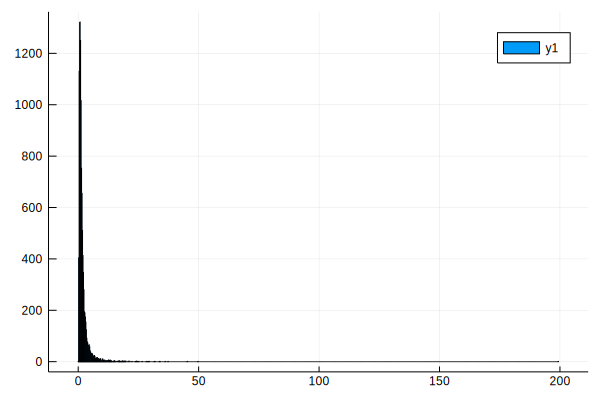

In [58]:
histogram(iW)

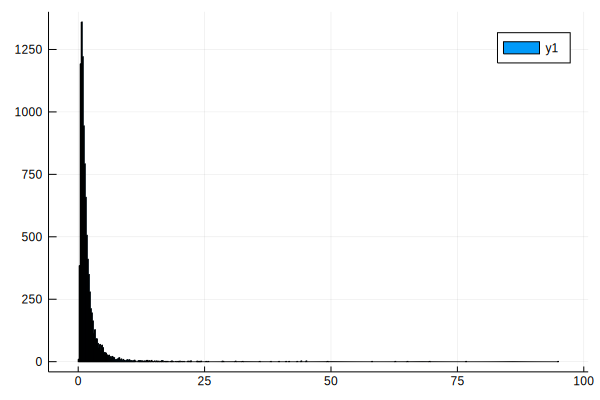

In [59]:
histogram(iC)